### Contenido
1. Fundamentos
2. Métricas
3. TensorBoard
4. Guardado de modelos
5. Grad-Cam



In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
from typing import List, Any, Optional

### Tensores y operaciones
* `torch.tensor(a)` 
    * a = `7 ` 
    * a = `[ 2 , 3 ]`
    * a =  `[ [1,2] , [3,4] ] `

Otro concepto importante para los tensores es su atributo shape. La forma te dice cómo están dispuestos los elementos en su interior.

* `.ndim` 
* `.shape`
* `.dtype`

In [2]:
torch.tensor([[1,2],[3,4],[5,6]])

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [3]:
scalar = torch.tensor(7)
vector = torch.tensor([7, 7])
matrix = torch.tensor([[7, 8],[9, 10]])
print(f" Dim matrix: {matrix.ndim} \n Shape vector : {vector.shape} \n dtype scalar: {scalar.dtype}")


 Dim matrix: 2 
 Shape vector : torch.Size([2]) 
 dtype scalar: torch.int64


In [5]:
matrix = torch.tensor([[7, 8],[9, 10]])
matrix.shape

torch.Size([2, 2])


<div style="text-align:center">
  <img src="img/pytorch-different-tensor-dimensions.png" alt="dim" width="70%">
</div>

### Manipulación de tensores (operaciones tensoriales)
En el aprendizaje profundo, los datos (imágenes, texto, vídeo, audio, estructuras de proteínas, etc.) se representan como tensores.
Un modelo aprende investigando esos tensores y realizando una serie de operaciones (podrían ser más de 1.000.000) sobre los tensores para crear una representación de los patrones en los datos de entrada.

1. Suma                 (+)  
2. Resta                (-)  
3. Multiplicación       (*)  
4. Producto matricial   (@)  

Una de las operaciones más comunes en los algoritmos de aprendizaje automático y aprendizaje profundo (como las redes neuronales) es la multiplicación de matrices. PyTorch implementa la funcionalidad de multiplicación de matrices en el método torch.matmul(). 

 * `(3, 2) @ (3, 2) ` >   **X**
 * `(2, 3) @ (3, 2)`  > (2,2)
 * `(3, 2) @ (2, 3)`  > (3,3)

Deben coincidir las dimensiones interiores! 

In [6]:
tensor = torch.tensor([1, 2, 3])

print(f'La suma {tensor} + {tensor}         = {tensor+tensor}')
print(f'La resta {tensor} - {tensor}        = {tensor-tensor}')
print(f'El producto {tensor} * {tensor}     = {tensor*tensor}')

#Observe cómo los valores del del tensor no se vieron afectados despues de operar
# esto se debe a que los valores dentro del tensor no cambian a menos que sean reasignados.

La suma tensor([1, 2, 3]) + tensor([1, 2, 3])         = tensor([2, 4, 6])
La resta tensor([1, 2, 3]) - tensor([1, 2, 3])        = tensor([0, 0, 0])
El producto tensor([1, 2, 3]) * tensor([1, 2, 3])     = tensor([1, 4, 9])


In [ ]:
torch.multiply(tensor, 10)  #otra función para multiplicar elemento a elemneto
print(tensor, "*", tensor, "Es igual a", tensor * tensor)


#multiplicacion entre matrices
torch.matmul(tensor, tensor)
tensor@tensor == torch.matmul(tensor, tensor)

In [7]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (Dará error)

print(tensor_A)
print(tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

Dado que gran parte del aprendizaje profundo consiste en multiplicar y realizar operaciones sobre matrices y que las matrices tienen una regla estricta sobre qué formas y tamaños se pueden combinar, siendo uno de los errores más comunes con los que te encontrarás en el aprendizaje profundo son los desajustes de forma.

Una de las formas de hacer esto es con una transposición (cambiar las dimensiones de un tensor dado).
Puedes realizar transposiciones en PyTorch usando `torch.transpose(input, dim0, dim1) `- donde input es el tensor a transponer y dim0 y dim1 son las dimensiones a intercambiar.

`tensor.T ` es la **transpuesta** del tensor  - donde tensor es el _tensor_ a transponer.

In [8]:
print(f"El tensor A \n {tensor_A}  con dimensión {tensor_A.shape}")
print(f"\nEl tensor B \n {tensor_B.T}  con dimensión {tensor_B.T.shape}")


print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)   #torch.mm(tensor_A, tensor_B.T) es otra forma
print(output) 
print(f"\nOutput shape: {output.shape}")


El tensor A 
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])  con dimensión torch.Size([3, 2])

El tensor B 
 tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])  con dimensión torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


#### Tipos de datos tensoriales
Hay muchos tipos de datos tensoriales disponibles en PyTorch. El tipo más común (y generalmente el predeterminado) es torch.float32 o torch.float.Esto se conoce como "punto flotante de 32 bits". Pero también hay punto flotante de 16 bits (torch.float16 o torch.half) y Y muchos más (torch.float64 o torch.double). 


La precisión es la cantidad de detalles que se utilizan para describir un número.
Cuanto mayor es el valor de precisión (8, 16, 32), más detalles y, por tanto, más datos se utilizan para expresar un número.
Esto es importante en el aprendizaje profundo y la computación numérica porque se realizan muchas operaciones, y cuanto más detalle se tenga para calcular, más cálculo se tendrá que utilizar. Por tanto, los tipos de datos de menor precisión suelen ser más rápidos de calcular, pero sacrifican algo de rendimiento en métricas de evaluación como la precisión (más rápidos de calcular, pero menos precisos).

In [9]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half 

float_16_tensor.dtype
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") 

tensor([[0.5400, 0.1759, 0.3050, 0.8583],
        [0.2585, 0.8690, 0.1971, 0.1100],
        [0.2883, 0.7053, 0.0108, 0.6663]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Generando Tensores
Generar vectores es útil para inicializar modelos de aprendizaje automático, calcular métricas, explorar datos y optimizar algoritmos. Facilitan la manipulación y procesamiento eficiente de información en diversas aplicaciones.

* `torch.zeros( size=(#,#)) `
* ` torch.arange(start=0, end=10, step=9)`
* `torch.ones( size=(#,#)) `
* `torch.rand( size=(#,#)) `


In [10]:
torch.zeros( size=(4,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:

random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype



(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [12]:
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.0011, 0.5674, 0.0503, 0.5763],
         [0.7244, 0.6161, 0.2410, 0.7803],
         [0.4050, 0.0365, 0.5242, 0.6311]]),
 torch.float32)

In [13]:
zero_to_ten = torch.arange(start=0, end=100, step=2)
zero_to_ten

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [15]:
zero_to_ten.ndim

1

A veces puedes querer un tensor de cierto tipo con la misma forma que otro tensor. Por ejemplo, un tensor de todos los ceros con la misma forma que un tensor anterior.

Para ello puede utilizar `torch.zeros_like(entrada)` o `torch.ones_like(entrada)` que devuelven un tensor lleno de ceros o unos con la misma forma que la entrada respectivamente.


In [18]:
ten_zeros = torch.zeros_like(input=zero_to_ten) 
len(ten_zeros) == len(zero_to_ten)

True

### torchvision
El paquete torchvision contiene conjuntos de datos, arquitecturas de modelos y transformaciones de imágenes habituales para la visión por computador. Los datos no siempre vienen en su forma procesada final que se requiere para el entrenamiento de algoritmos de aprendizaje automático. Utilizamos transformaciones para realizar alguna manipulación de los datos y hacerlos adecuados para el entrenamiento.



In [19]:
import torchvision

data = torchvision.datasets.OxfordIIITPet(
    root='data/', download=True  )

100%|██████████| 791918971/791918971 [04:09<00:00, 3173586.74it/s] 


Extracting data\oxford-iiit-pet\images.tar.gz to data\oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:14<00:00, 1302627.92it/s]


Extracting data\oxford-iiit-pet\annotations.tar.gz to data\oxford-iiit-pet


In [ ]:
data[0][0]

image type: <class 'PIL.Image.Image'>, label type: <class 'int'>


Text(0.5, 1.0, 'Image shape: (225, 300, 3)\nlabel: American Pit Bull Terrier')

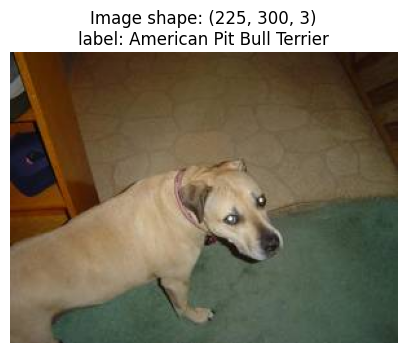

In [20]:
image, label = data[140]
print(f"image type: {type(image)}, label type: {type(label)}")
text_label = data.classes[label] # The data object has a list with the class names.
title = f"""\
Image shape: ({image.height}, {image.width}, {len(image.getbands())})
label: {text_label}"""

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.title(title)

In [21]:
def plot_images(images: List[Any], titles: Optional[List[str]] = None):
    """Plots a list of images with their corresponding titles if given."""
    num_images = len(images)
    fig, axs = plt.subplots(ncols=num_images, figsize=(num_images*5, 5))
    for ax, image in zip(axs.flat, images):
        ax.imshow(image)
        ax.set_title(image.size)

#### Geometría

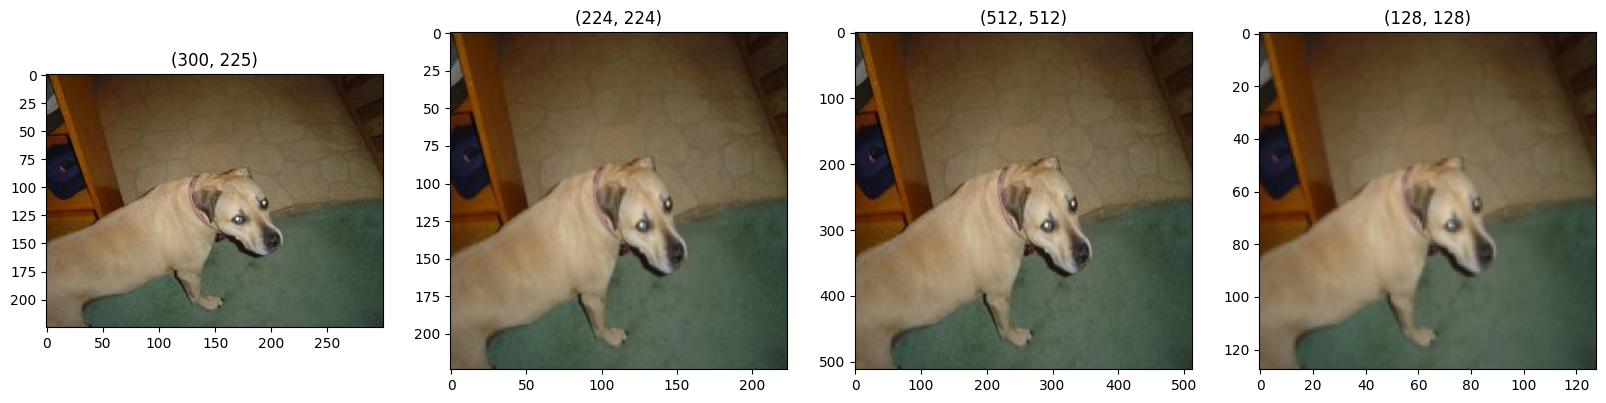

In [22]:
resize_224 = torchvision.transforms.Resize(size=(224, 224))
resize_512 = torchvision.transforms.Resize(size=(512, 512))
resize_128 = torchvision.transforms.Resize(size=(128, 128))

resized_image_224 = resize_224(image)
resized_image_512 = resize_512(image)
resized_image_128 = resize_128(image)

plot_images(
    images=[image, resized_image_224, resized_image_512, resized_image_128], 
    titles=["Original", "Resized 224", "Resized 512", "Resized 128"]
)

In [25]:
ima ,label = data[0]
ima2 ,label2 = data[1]

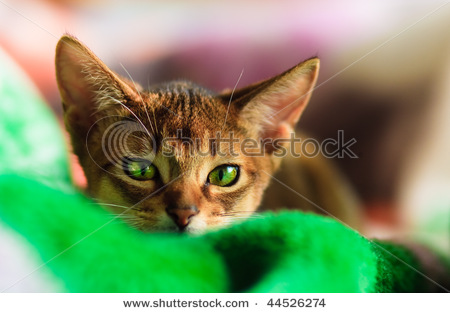

In [27]:
ima2

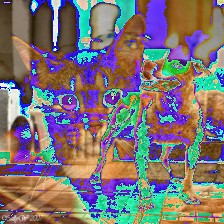

In [53]:
ima ,label = data[2]
ima2 ,label2 = data[100]

tensor= torchvision.transforms.ToTensor()
resize_224 = torchvision.transforms.Resize(size=(224, 224))

a=resize_224(ima)
b= resize_224(ima2)

pil =torchvision.transforms.ToPILImage()
#print(a, tensor(a).ndim, pil(tensor(a)))
c= tensor(a) + 2*tensor(b) 
pil(c)

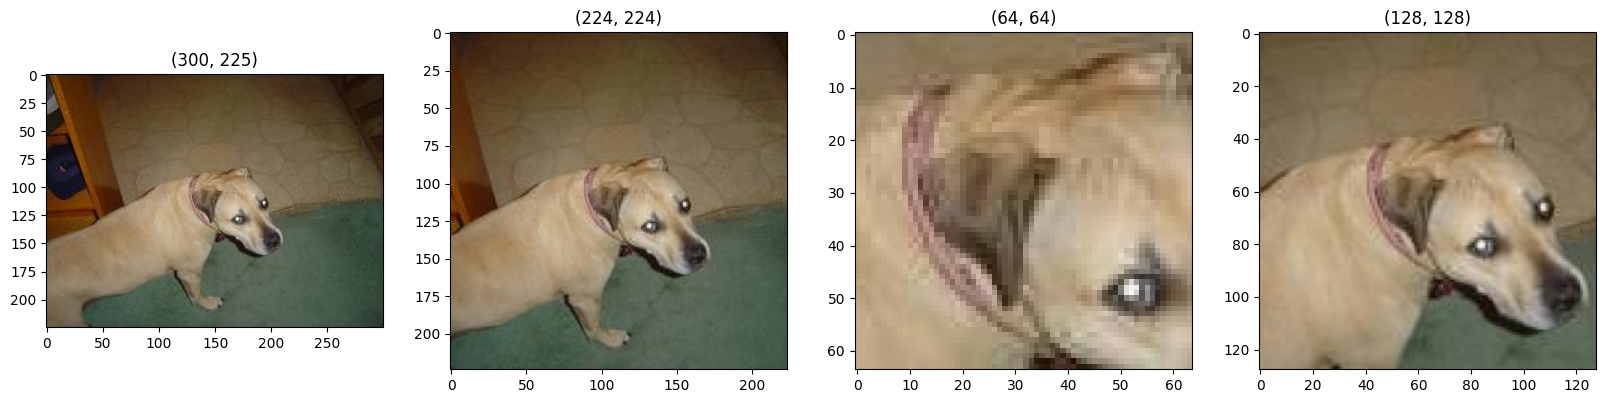

In [34]:
ccrop_224 = torchvision.transforms.CenterCrop(size=(224, 224))
ccrop_64 = torchvision.transforms.CenterCrop(size=(64, 64))
ccrop_128 = torchvision.transforms.CenterCrop(size=(128, 128))

resized_image_224 = ccrop_224(image)
resized_image_64 = ccrop_64(image)
resized_image_128 = ccrop_128(image)

plot_images(
    images=[image, resized_image_224, resized_image_64, resized_image_128], 
    titles=["Original", "Center Crop 224", "Center Crop 512", "Center Crop 128"] )

In [ ]:
random_resized_crop_224 = torchvision.transforms.RandomResizedCrop(size=(224, 224))

random_rrc224_image_1 = random_resized_crop_224(image)
random_rrc224_image_2 = random_resized_crop_224(image)
random_rrc224_image_3 = random_resized_crop_224(image)

plot_images(
    images=[image, random_rrc224_image_1, random_rrc224_image_2, random_rrc224_image_3], 
    titles=["Original", "Random Resized Crop 224 Flip 1", "Random Resized Crop 224 Flip 2", "Random Resized Crop 224 Flip 3"]
)

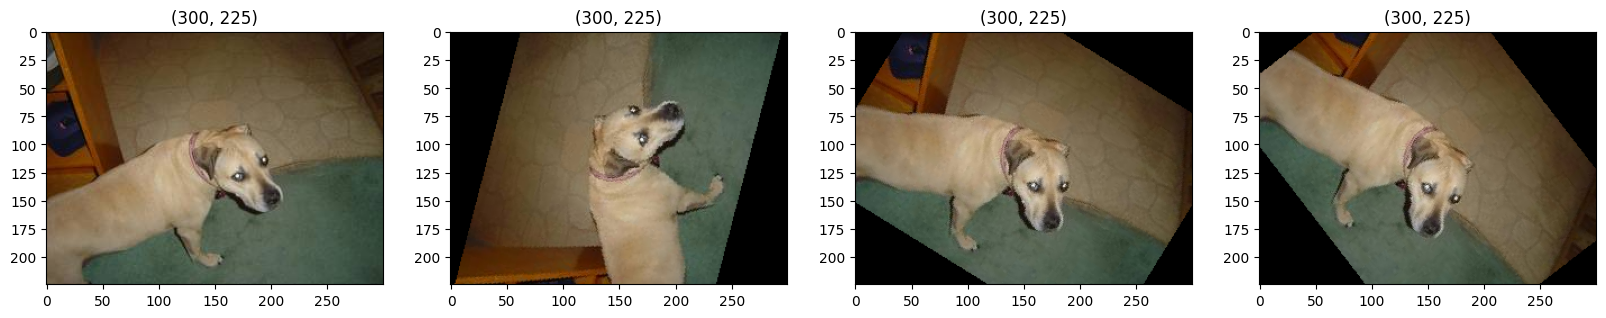

In [37]:
random_rot = torchvision.transforms.RandomRotation(degrees=80)

random_rot_image_1 = random_rot(image)
random_rot_image_2 = random_rot(image)
random_rot_image_3 = random_rot(image)

plot_images(
    images=[image, random_rot_image_1, random_rot_image_2, random_rot_image_3], 
    titles=["Original", "Random rotation 1", "Random rotation 2", "Random rotation 3"])

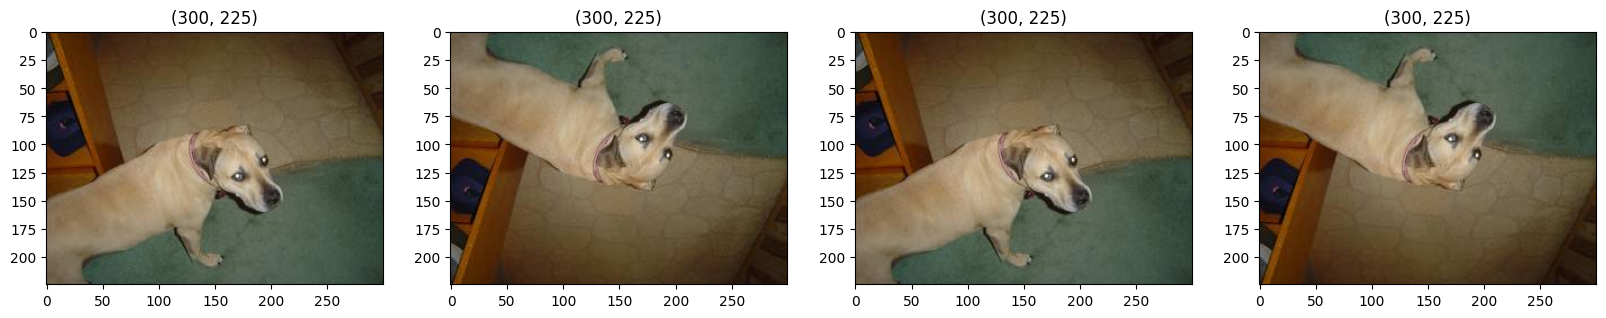

In [38]:
random_vflip = torchvision.transforms.RandomVerticalFlip(p=0.5)

random_vflip_image_1 = random_vflip(image)
random_vflip_image_2 = random_vflip(image)
random_vflip_image_3 = random_vflip(image)

plot_images(
    images=[image, random_vflip_image_1, random_vflip_image_2, random_vflip_image_3], 
    titles=["Original", "Random Vertical Flip 1", "Random Vertical Flip 2", "Random Vertical Flip 3"])

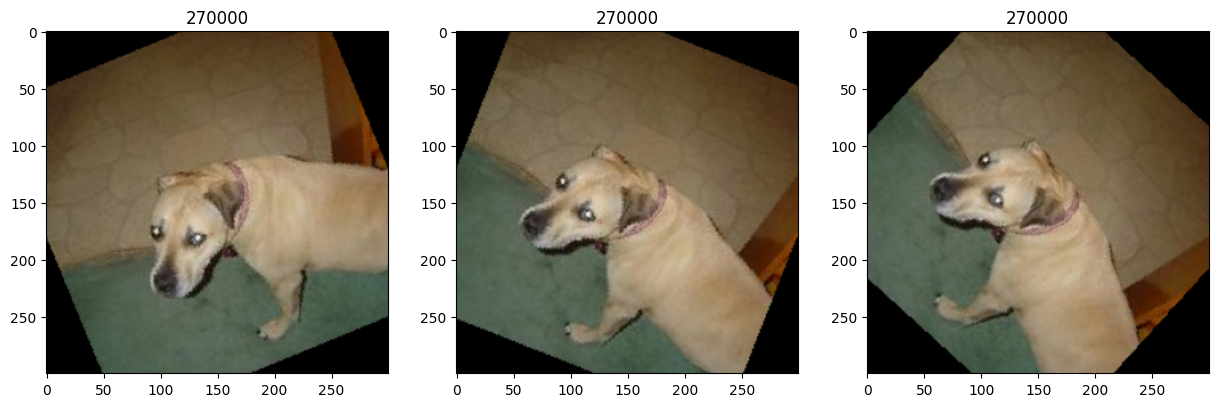

In [42]:
transforms_pipeline = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.CenterCrop(size=(224, 224)),
    torchvision.transforms.RandomRotation(degrees=45),
    torchvision.transforms.Resize(size=(300, 300)),
    torchvision.transforms.RandomHorizontalFlip(p=1)
])

transformed_images = [transforms_pipeline(image).numpy().transpose(1, 2, 0) for _ in range(3)]
titles = [f"Transforms pipeline image {i}" for i in range(1, 4)]
plot_images(images=transformed_images, titles=titles)

#### Color 

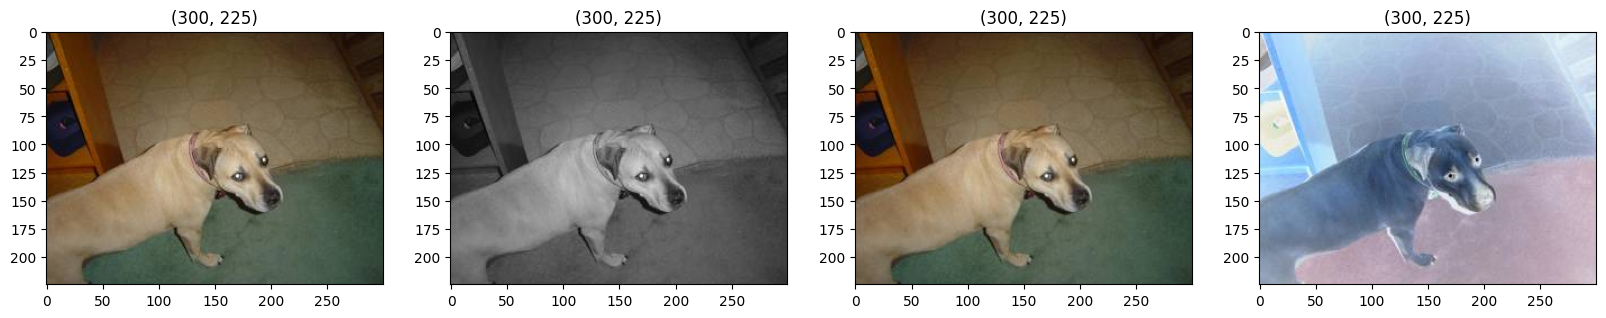

In [43]:
gray=torchvision.transforms.RandomGrayscale(p=0.7)(image)
blur=torchvision.transforms.GaussianBlur(kernel_size=(91,91))(image)
negative=torchvision.transforms.RandomInvert(p=0.5)(image)


plot_images(
    images=[image, gray, blur, negative], 
    titles=["Original", "Random Vertical Flip 1", "Random Vertical Flip 2", "Random Vertical Flip 3"])

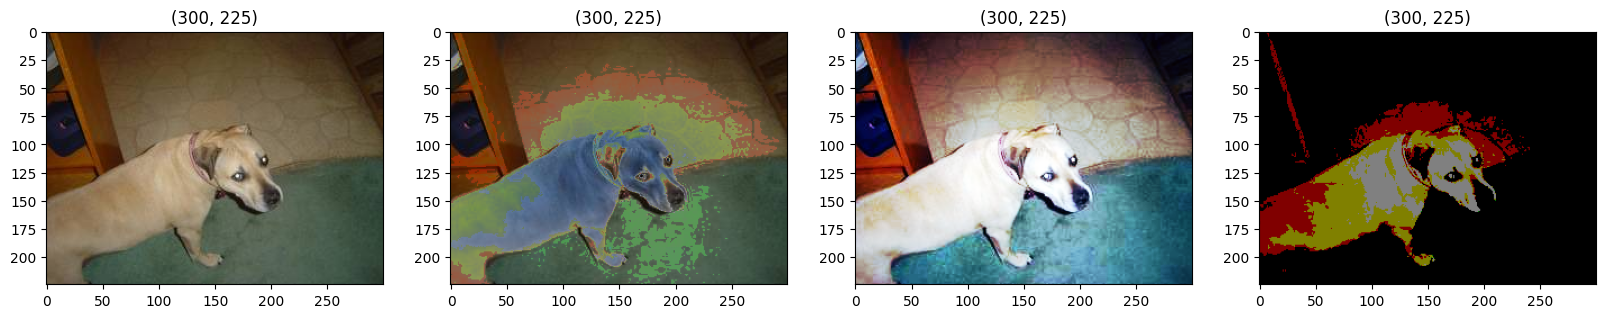

In [48]:
solar=torchvision.transforms.RandomSolarize(100.2, p=1)(image)
equa=torchvision.transforms.RandomEqualize(p=1)(image)
poster = torchvision.transforms.RandomPosterize(1, p=1)(image)


plot_images(
    images=[image, solar, equa, poster], 
    titles=["Original", "Random Vertical Flip 1", "Random Vertical Flip 2", "Random Vertical Flip 3"])


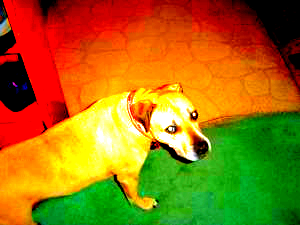

In [51]:
color=torchvision.transforms.ColorJitter(brightness = 5, contrast= 22, saturation= 3, hue= 0)
color(image)

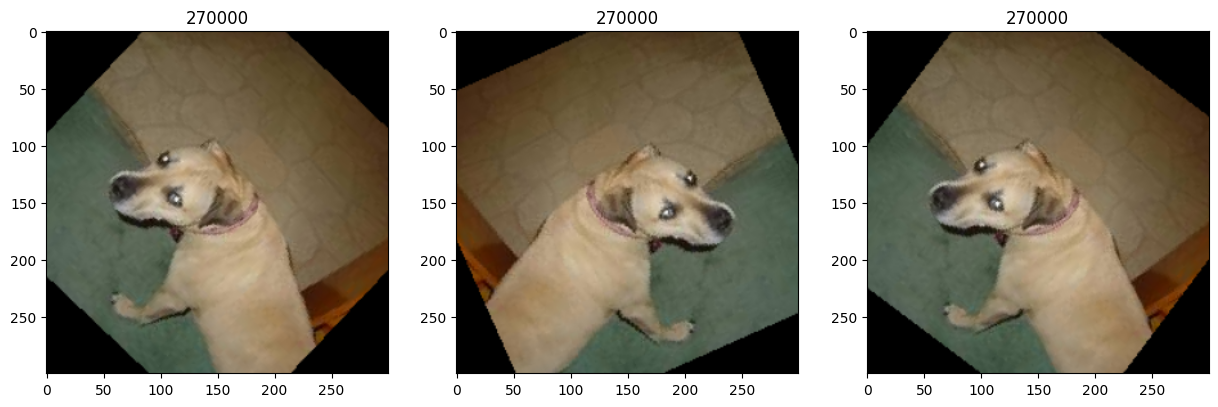

In [52]:
transforms_pipeline = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.CenterCrop(size=(224, 224)),
    torchvision.transforms.RandomRotation(degrees=45),
    torchvision.transforms.Resize(size=(300, 300)),
    torchvision.transforms.RandomHorizontalFlip(p=0.5)
])

transformed_images = [transforms_pipeline(image).numpy().transpose(1, 2, 0) for _ in range(3)]
titles = [f"Transforms pipeline image {i}" for i in range(1, 4)]
plot_images(images=transformed_images, titles=titles)

### Ejercicio
Crear una composición que haga transformaciones de manera aletoria usando unicamente librerias de pytorch.